In [4]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Workshop5/FruitinAmazon.zip"
extract_path = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Workshop5"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check if the dataset exists
data_dir = os.path.join(extract_path, "FruitinAmazon/train")

if os.path.exists(data_dir):
    print("Extraction successful. Dataset is ready.")
else:
    print("Extraction failed or incorrect folder structure.")


Extraction successful. Dataset is ready.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task 1

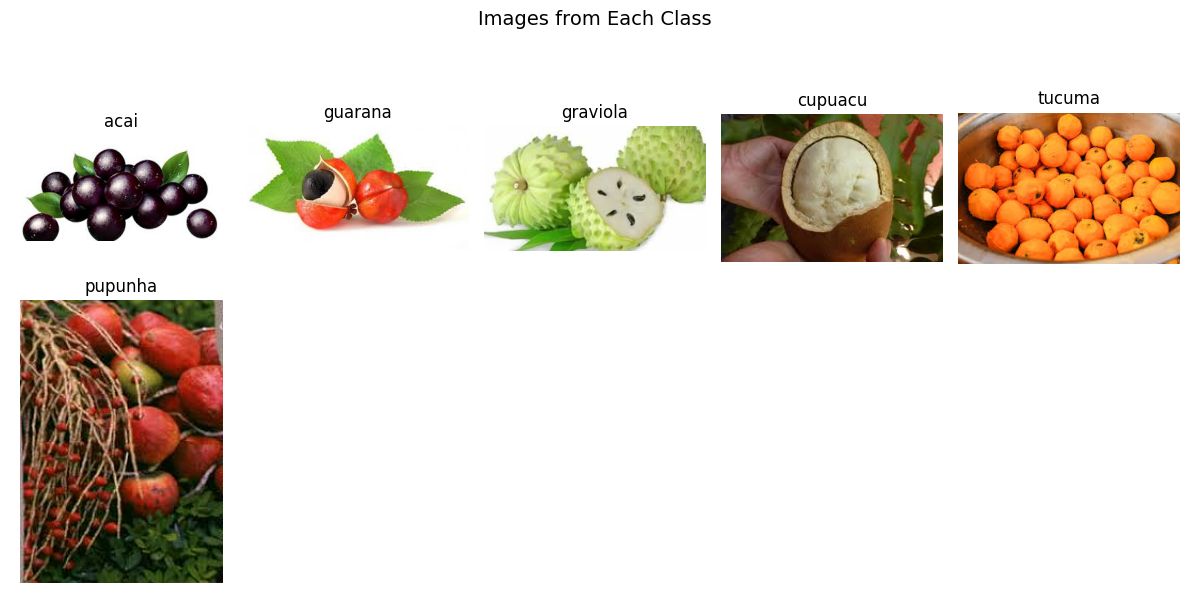

In [5]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the dataset (Update this path as per your dataset location)
data_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Workshop5/FruitinAmazon/train"

# Get the list of class directories
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Select one random image from each class
selected_images = {}
for fruit_class in classes:
    class_dir = os.path.join(data_dir, fruit_class)
    image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

    if image_files:  # Ensure there are images in the folder
        selected_images[fruit_class] = os.path.join(class_dir, random.choice(image_files))

# If no images were found, display an error message
if not selected_images:
    print("No images found in the dataset directory.")
else:
    # Determine the grid size
    num_images = len(selected_images)
    num_cols = min(5, num_images)  # Limit columns to 5 for better visualization
    num_rows = max(1, (num_images + num_cols - 1) // num_cols)  # Prevent division by zero

    # Plot images in a grid format
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6))
    fig.suptitle("Images from Each Class", fontsize=14)

    # Flatten axes for easy iteration
    axes = axes.flatten() if num_images > 1 else [axes]

    # Display images
    for idx, (fruit_class, img_path) in enumerate(selected_images.items()):
        img = mpimg.imread(img_path)
        axes[idx].imshow(img)
        axes[idx].set_title(fruit_class)
        axes[idx].axis("off")

    # Hide unused subplots
    for idx in range(num_images, len(axes)):
        axes[idx].axis("off")

    plt.tight_layout()
    plt.show()

In [6]:
import os
from PIL import Image

# Define the train dataset directory
data_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Workshop5/FruitinAmazon/train"

# List to store corrupted images
corrupted_images = []

# Iterate through all class subdirectories
for fruit_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, fruit_class)

    if not os.path.isdir(class_dir):  # Skip if not a directory
        continue

    # Iterate through all images in the class directory
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)

        try:
            with Image.open(image_path) as img:
                img.verify()  # Verify if the image is valid
        except (IOError, SyntaxError):
            corrupted_images.append(image_path)
            os.remove(image_path)  # Remove corrupted image
            print(f"Removed corrupted image: {image_path}")

# Print the final message
if not corrupted_images:
    print("No Corrupted Images Found.")
else:
    print(f"Total {len(corrupted_images)} corrupted images removed.")


No Corrupted Images Found.


# Task 2

In [7]:
import tensorflow as tf

# Define paths and preprocessing parameters
train_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Workshop5/FruitinAmazon/train"
img_height = 128  # Image height
img_width = 128   # Image width
batch_size = 32   # Batch size
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0,1]

# Load Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Normalize the Training Dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Load Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Normalize the Validation Dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

# Print dataset details
print(f"Training Dataset: {train_ds}")
print(f"Validation Dataset: {val_ds}")


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Training Dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation Dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


# Task 3

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define image size and number of classes
img_height = 128
img_width = 128
num_classes = 10  # Change based on your dataset

# Build the CNN Model
model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), strides=1, padding="same", activation="relu", input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"),
    layers.MaxPooling2D((2, 2), strides=2),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),

    # Output Layer (Softmax for multi-class classification)
    layers.Dense(num_classes, activation="softmax")
])

# Compile the Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Print Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,970 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

# Task 4

In [9]:
# Compile the model
model.compile(optimizer='adam',                            # Adam optimizer
              loss='sparse_categorical_crossentropy',       # Sparse Categorical Crossentropy loss for multi-class classification
              metrics=['accuracy'])                        # Accuracy metric for evaluation


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Set up callbacks
checkpoint = ModelCheckpoint('best_model.h5',
                             monitor='val_accuracy',   # Monitor validation accuracy
                             save_best_only=True,       # Save only the best model
                             mode='max',                # Save when validation accuracy improves
                             verbose=1)                 # Display saving model messages

early_stop = EarlyStopping(monitor='val_loss',             # Monitor validation loss for early stopping
                           patience=10,                   # Stop after 10 epochs with no improvement
                           restore_best_weights=True,     # Restore the best model's weights
                           verbose=1)                     # Display early stopping messages

# Train the model
history = model.fit(
    train_ds,                                             # Training dataset
    validation_data=val_ds,                                # Validation dataset
    epochs=250,                                            # Number of epochs to train
    batch_size=16,                                         # Batch size
    callbacks=[checkpoint, early_stop],                    # Callbacks for saving best model and stopping early
    verbose=1                                              # Display training progress
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.1701 - loss: 2.2825
Epoch 1: val_accuracy improved from -inf to 0.83333, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 691ms/step - accuracy: 0.1693 - loss: 2.2761 - val_accuracy: 0.8333 - val_loss: 1.5148
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.1285 - loss: 1.8914
Epoch 2: val_accuracy did not improve from 0.83333
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 529ms/step - accuracy: 0.1380 - loss: 1.8847 - val_accuracy: 0.0000e+00 - val_loss: 1.5927
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.1829 - loss: 1.6408
Epoch 3: val_accuracy did not improve from 0.83333
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 518ms/step - accuracy: 0.1962 - loss: 1.6277 - val_accuracy: 0.0556 - val_loss: 1.8576
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 592ms/step - accuracy: 0.5295 - loss: 1.3195
Epoch 4: val_accuracy did not improve from 0.83333
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 739ms/step - accuracy: 0.5326 - loss: 1.3155 - val_accuracy: 0.8333 - val_loss: 1.0513
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.5139 - loss: 1.1742
Epoch 5: val_accuracy did not improve from 

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 636ms/step - accuracy: 0.8346 - loss: 0.6157 - val_accuracy: 0.8889 - val_loss: 0.7229
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.9659 - loss: 0.4805
Epoch 8: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 551ms/step - accuracy: 0.9605 - loss: 0.4851 - val_accuracy: 0.8889 - val_loss: 0.5992
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.9757 - loss: 0.3268
Epoch 9: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 541ms/step - accuracy: 0.9714 - loss: 0.3323 - val_accuracy: 0.7778 - val_loss: 0.6327
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.9294 - loss: 0.2519
Epoch 10: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 832ms/step - accuracy: 0.9332 - loss: 0.2458 - val_accuracy: 0.6111 - val_loss: 0.9155
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9595 - loss: 0.2118
Epoch 11: val_accuracy did not improve from 

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 599ms/step - accuracy: 1.0000 - loss: 0.0125 - val_accuracy: 0.9444 - val_loss: 0.4388
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 1.0000 - loss: 0.0159
Epoch 17: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 490ms/step - accuracy: 1.0000 - loss: 0.0162 - val_accuracy: 0.8889 - val_loss: 0.4155
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 1.0000 - loss: 0.0051
Epoch 18: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.8333 - val_loss: 0.4140
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 1.0000 - loss: 0.0046
Epoch 19: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.7778 - val_loss: 0.4970
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 1.0000 - loss: 0.0050
Epoch 20: val_accuracy did not improve from 0.

# Task 5: Model Evaluation

In [11]:
import tensorflow as tf

# Define image size and batch size
img_height = 128  # Example image height
img_width = 128  # Example image width
batch_size = 16  # Batch size for test set

# Path to your test directory
test_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Workshop5/FruitinAmazon/test"  # Update this with the correct path to your test images

# Create the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds, verbose=1)

# Print the results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Found 30 files belonging to 6 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7389 - loss: 115.2405
Test Loss: 138.1572
Test Accuracy: 0.7333


# Task 6

In [12]:
model.save('my_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [13]:
# Import the necessary function to load the model
from tensorflow.keras.models import load_model

# Load the saved model from the .h5 file
loaded_model = load_model('my_model.h5')
print("Model loaded successfully!")

# Evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(test_ds, verbose=1)

# Print the evaluation results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Model loaded successfully!
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7389 - loss: 115.2405
Test Loss: 138.1572
Test Accuracy: 0.7333


# Task 7

In [14]:
import numpy as np
from sklearn.metrics import classification_report

# Get the true labels for the test dataset
true_labels = []
for images, labels in test_ds:
    true_labels.extend(labels.numpy())

# Make predictions on the test dataset
predictions = model.predict(test_ds, verbose=1)

# Convert predicted probabilities to class labels using np.argmax
predicted_labels = np.argmax(predictions, axis=1)

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=test_ds.class_names)

# Print the classification report
print(report)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
              precision    recall  f1-score   support

        acai       0.75      0.60      0.67         5
     cupuacu       0.75      0.60      0.67         5
    graviola       0.50      1.00      0.67         5
     guarana       0.83      1.00      0.91         5
     pupunha       1.00      0.80      0.89         5
      tucuma       1.00      0.40      0.57         5

    accuracy                           0.73        30
   macro avg       0.81      0.73      0.73        30
weighted avg       0.81      0.73      0.73        30

